## Packages 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import statsmodels.api as sm
import datetime

## Open data

In [3]:
#Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv')

## Top 6 species selection

In [5]:
data_dir1 = data_day.loc[data_day['direction1'] > 0]
liste_especes = data_dir1[data_dir1['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]

In [7]:
species_sum_day = liste_especes.groupby(['year', 'date_dt', 'species'])['direction1'].sum().reset_index()

species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])

species_sum_day['day_month'] = species_sum_day['date_dt'].dt.strftime('%d-%B')

# Convert month to French
month_translation = {
    'June': 'juin', 'July': 'juil', 'August': 'août', 'September': 'sept', 'October': 'oct', 'November': 'novembre'
}

species_sum_day['day_month'] = species_sum_day['day_month'].replace(month_translation, regex=True)
species_sum_day = species_sum_day.sort_values(by='date_dt')

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/1999848208.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])


In [8]:
species_sum_day.head()

,year,date_dt,species,direction1,day_month
0,2016,2016-07-18,Milan noir,188.0,18-juil
1,2016,2016-07-19,Milan noir,170.0,19-juil
2,2016,2016-07-20,Bondrée apivore,1.0,20-juil
3,2016,2016-07-23,Cigogne noire,1.0,23-juil
4,2016,2016-07-23,Milan noir,1522.0,23-juil


## Sort dates

In [9]:
species_sum_day.day_month.unique()

array(['18-juil', '19-juil', '20-juil', '23-juil', '24-juil', '25-juil',
       '26-juil', '27-juil', '28-juil', '29-juil', '30-juil', '01-août',
       '02-août', '03-août', '05-août', '06-août', '07-août', '08-août',
       '09-août', '10-août', '11-août', '12-août', '13-août', '14-août',
       '15-août', '16-août', '17-août', '19-août', '21-août', '22-août',
       '23-août', '24-août', '25-août', '26-août', '27-août', '28-août',
       '30-août', '31-août', '01-sept', '02-sept', '03-sept', '04-sept',
       '05-sept', '06-sept', '07-sept', '09-sept', '10-sept', '11-sept',
       '12-sept', '13-sept', '15-sept', '20-sept', '21-sept', '22-sept',
       '27-sept', '28-sept', '03-oct', '04-oct', '21-juil', '22-juil',
       '31-juil', '04-août', '18-août', '20-août', '29-août', '08-sept',
       '16-sept', '17-sept', '19-sept', '23-sept', '24-sept', '26-sept',
       '29-sept', '05-oct', '08-oct', '14-sept', '25-sept', '30-sept',
       '09-oct', '13-oct', '07-oct', '10-oct', '18-sept

In [10]:
sorted_selected_dates = [

    '18-juil', '19-juil', '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil', '27-juil',
     '28-juil', '29-juil', '30-juil', '31-juil',

     '01-août', '02-août', '03-août', '04-août', '05-août', '06-août', '07-août','08-août', '09-août', '10-août', '11-août',
     '12-août', '13-août', '14-août','15-août', '16-août', '17-août', '18-août', '19-août', '20-août', '21-août','22-août', '23-août',
     '24-août', '25-août', '26-août', '27-août', '28-août','29-août', '30-août', '31-août',

     '01-sept', '02-sept', '03-sept', '04-sept','05-sept', '06-sept', '07-sept', '08-sept', '09-sept', '10-sept', '11-sept','12-sept',
     '13-sept', '14-sept', '15-sept', '16-sept', '17-sept', '18-sept','19-sept', '20-sept', '21-sept', '22-sept', '23-sept', '24-sept',
     '25-sept','26-sept', '27-sept', '28-sept', '29-sept', '30-sept',

     '01-oct', '02-oct','03-oct', '04-oct', '05-oct', '06-oct', '07-oct', '08-oct', '09-oct','10-oct', '11-oct', '12-oct', '13-oct'

     ]


In [11]:
# Filter DataFrame
species_sum_day = species_sum_day[species_sum_day['day_month'].isin(sorted_selected_dates)]

# Create a categorical type with the desired order
species_sum_day['day_month'] = pd.Categorical(species_sum_day['day_month'], categories=sorted_selected_dates, ordered=True)

# Sort DataFrame by the categorical column
sorted_species_sum_day = species_sum_day.sort_values('day_month')

sorted_species_sum_day.rename(columns={'year':'Année'}, inplace=True)

sorted_species_sum_day.head()


,Année,date_dt,species,direction1,day_month
0,2016,2016-07-18,Milan noir,188.0,18-juil
765,2020,2020-07-18,Milan noir,79.0,18-juil
1204,2022,2022-07-18,Milan noir,908.0,18-juil
1205,2022,2022-07-18,Milan royal,1.0,18-juil
570,2019,2019-07-18,Milan noir,183.0,18-juil


## Plot

### Milan noir

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/378888506.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/378888506.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/378888506.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/378888506.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/378888506.py:10

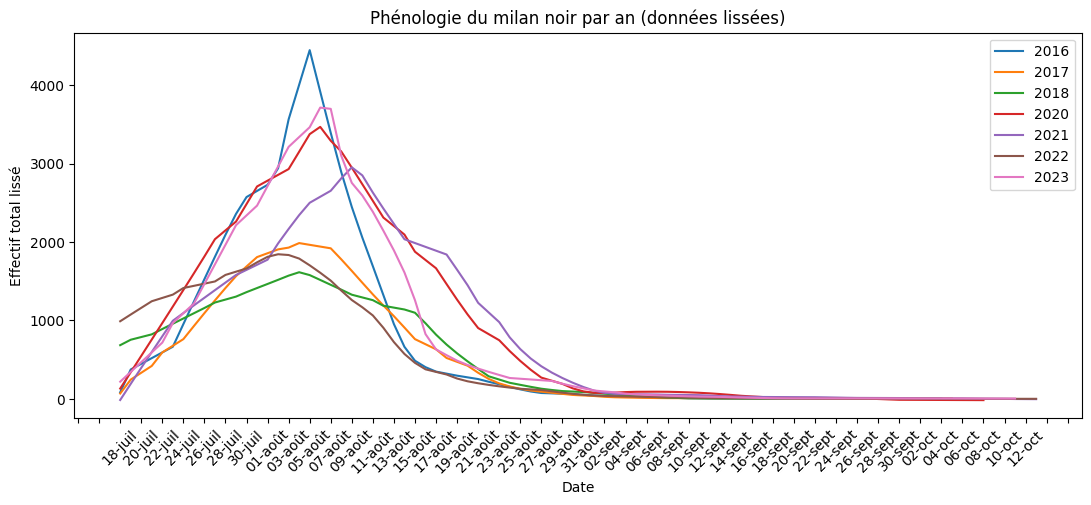

In [85]:
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    milan_noir = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan noir'])]
    milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]

    milan_noir['day_float'] = np.linspace(1, len(milan_noir), num=len(milan_noir))

    x = np.array(milan_noir.day_float)
    y = np.array(milan_noir.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=milan_noir['day_month'], y=z[:, 1], label=year)

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total lissé')
plt.title('Phénologie du milan noir par an (données lissées)')
plt.legend()

# Display the plot
plt.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/données_lissées/phenologie_donnees_lissees_milan_noir.png')

### Milan royal

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/2416884820.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  espece = espece[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/2416884820.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  espece = espece[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/2416884820.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  espece = espece[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/2416884820.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  espece = espece[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_98699/2416884820.py:10: UserWarning: Boolean Seri

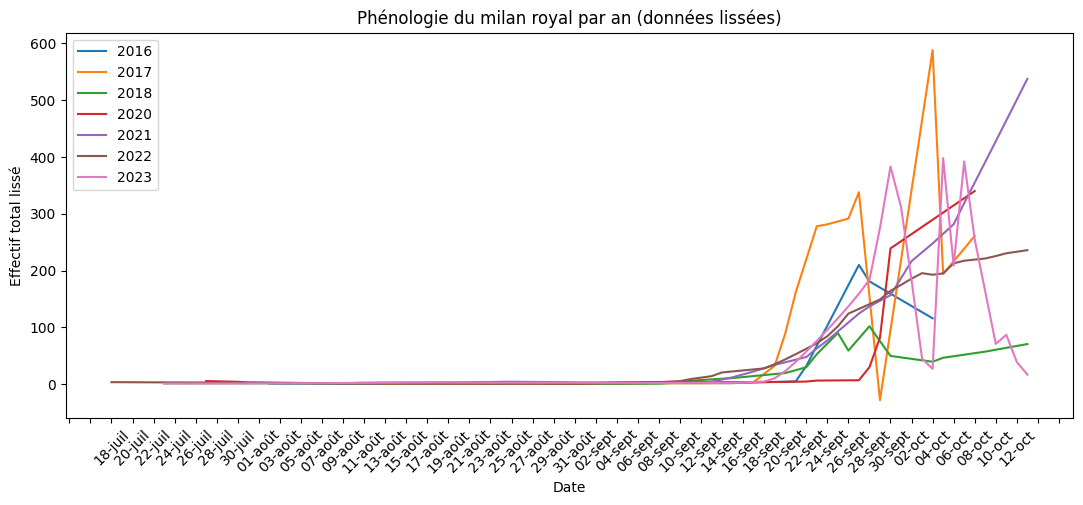

In [87]:
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    espece = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan royal'])]
    espece = espece[sorted_species_sum_day['Année'].isin([year])]

    espece['day_float'] = np.linspace(1, len(espece), num=len(espece))

    x = np.array(espece.day_float)
    y = np.array(espece.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=espece['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=espece['day_month'], y=z[:, 1], label=year)

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total lissé')
plt.title('Phénologie du milan royal par an (données lissées)')
plt.legend()

# Display the plot
plt.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/données_lissées/phenologie_donnees_lissees_milan_royal.png')